# Importing the dataset

In [1]:
import pandas as pd 
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualisations

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

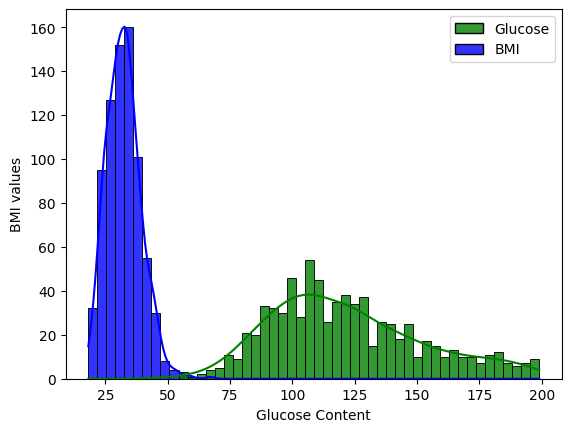

In [6]:
# Constructing histograms

sns.histplot([df['Glucose'],df['BMI']], bins = 50, kde = True, alpha = 0.8, palette = ['green','blue'])
plt.xlabel('Glucose Content')
plt.ylabel('BMI values')
plt.show()

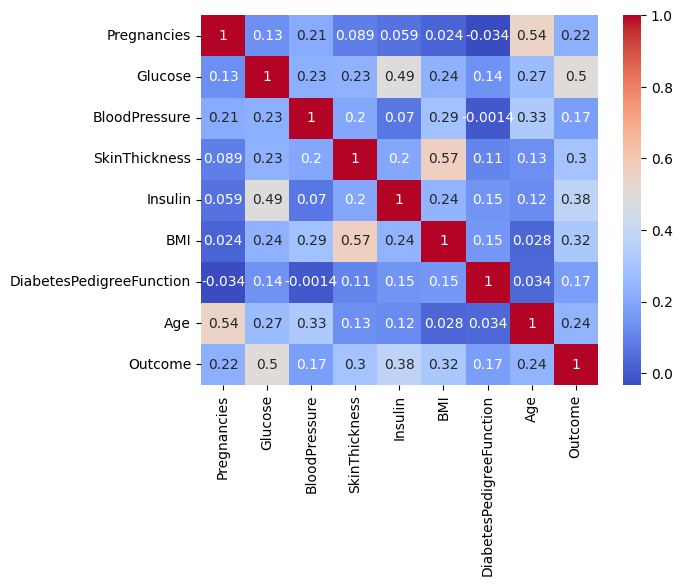

In [7]:
# correlation map

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

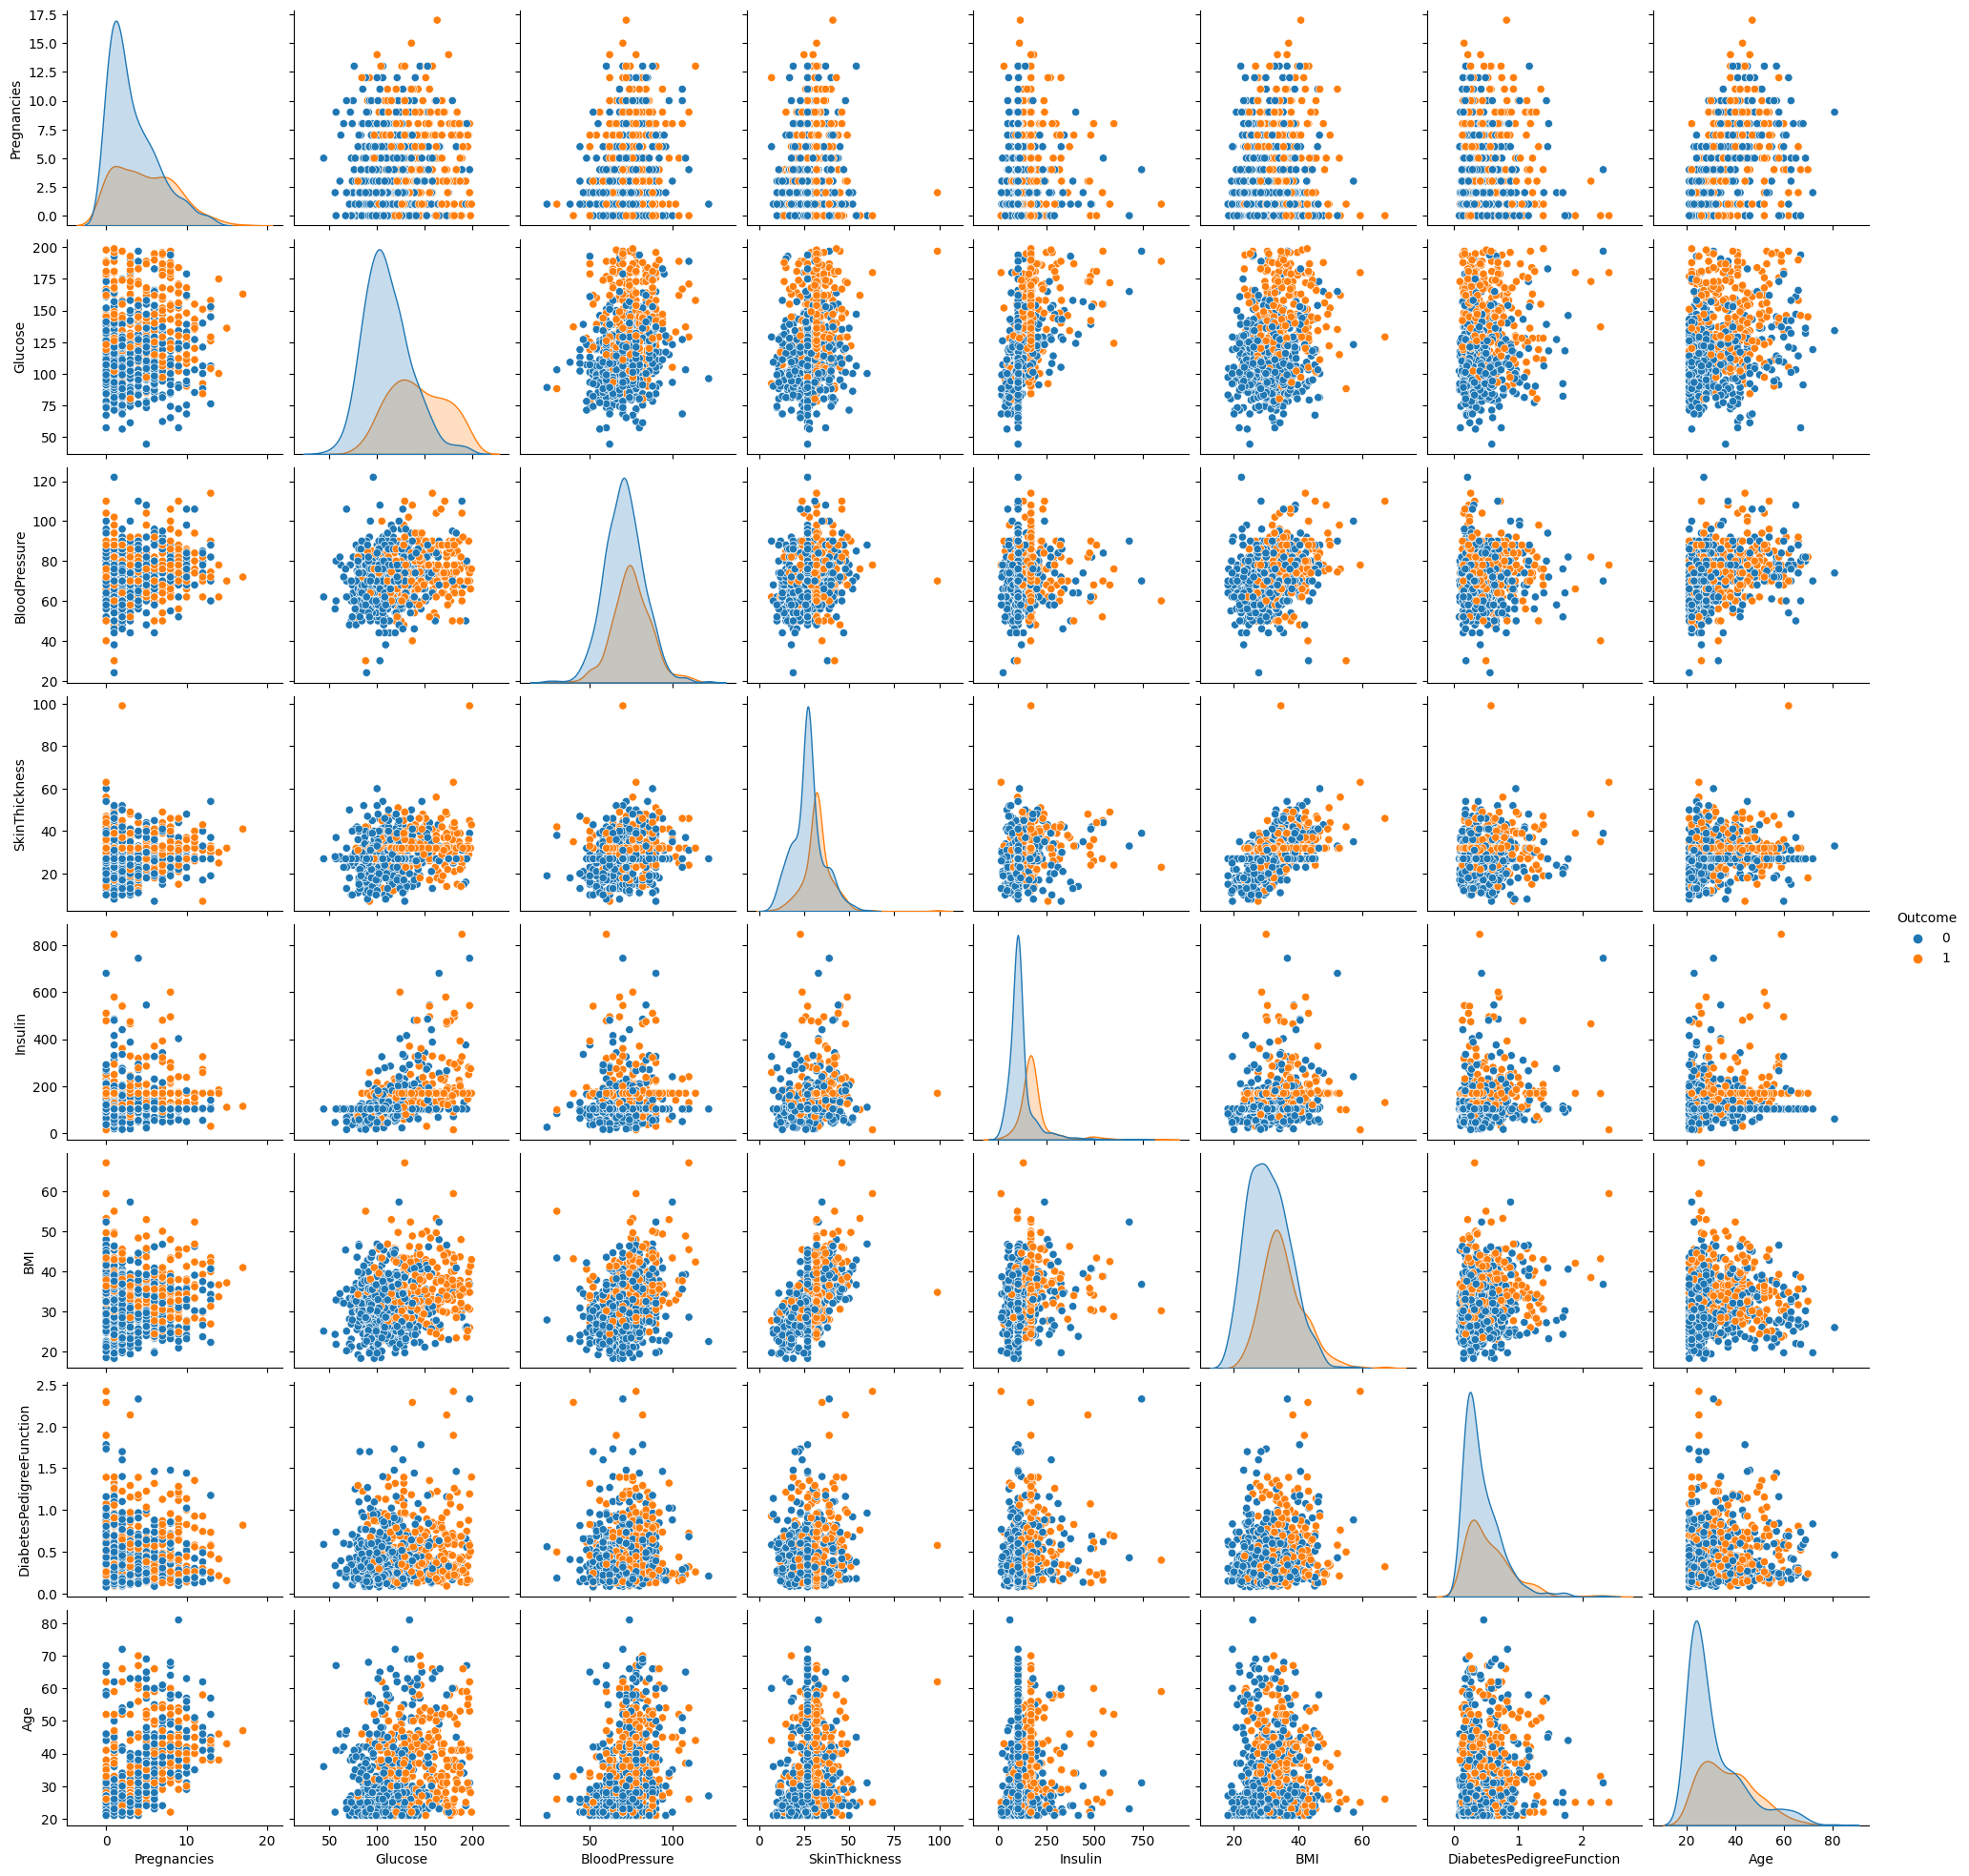

In [8]:
# pairpot

sns.pairplot(df, hue = 'Outcome')

# Splitting Dataset into Training and Testing

In [9]:
Y = df['Outcome']
X = df.drop(columns = 'Outcome', axis = 1)

In [10]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,169.5,33.6,0.627,50
1,1,85,66.0,29,102.5,26.6,0.351,31
2,8,183,64.0,32,169.5,23.3,0.672,32
3,1,89,66.0,23,94.0,28.1,0.167,21
4,0,137,40.0,35,168.0,43.1,2.288,33


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [13]:
dia_en = pd.DataFrame()
res = pd.DataFrame()
dia_en['Outcome'] = Y_test

# Data Preprocessing 

# Handling class imbalance 

In [14]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 42)
X, Y = ROS.fit_resample(X, Y)

In [32]:
# pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
# pip install --upgrade imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB 1.3 MB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 787.7 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 819.2 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 819.2 kB/s eta 0:00:01
   --------------------------- ---------- 184.3/258.3 kB 857.5 kB/s eta 0:00:01
   --------------------------- ---------- 184.3/258.3 kB 857.5 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 792.6 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


# Data Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [16]:
X_SS = SS.fit_transform(X)

In [17]:
X = pd.DataFrame(X_SS, columns = X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.537350,0.709404,-0.095828,0.581760,0.179214,0.091346,0.426107,1.366370
1,-0.887981,-1.332745,-0.599746,-0.106578,-0.551870,-0.924738,-0.388060,-0.272067
2,1.107482,1.843931,-0.767719,0.237591,0.179214,-1.403749,0.558852,-0.185833
3,-0.887981,-1.203085,-0.599746,-0.794916,-0.644620,-0.707006,-0.930838,-1.134402
4,-1.173047,0.352838,-2.783390,0.581760,0.162846,1.470317,5.325858,-0.099600


In [18]:
# importing modules for performance metrices
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,auc, confusion_matrix, ConfusionMatrixDisplay

# Fitting Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [20]:
LogReg.probability = False
LogReg.fit(X_train, Y_train)

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
Y_pred_test = LogReg.predict(X_test)

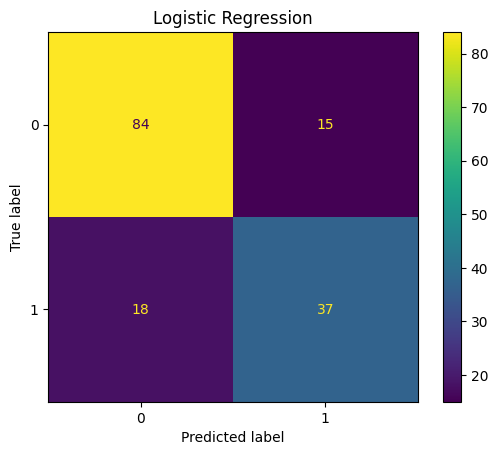

In [22]:
AccuracyScore = accuracy_score(Y_test, Y_pred_test)
PrecisionScore = precision_score(Y_test, Y_pred_test)
RecallScore = recall_score(Y_test, Y_pred_test)
F1Score = f1_score(Y_test, Y_pred_test)
LogReg_fpr, LogReg_tpr, LogReg_thresholds = roc_curve(Y_test, Y_pred_test)
AUC = auc(LogReg_fpr, LogReg_tpr)

res['Log_R'] = pd.DataFrame({'Log_R': [AccuracyScore, PrecisionScore, RecallScore, F1Score, AUC]})
cm = confusion_matrix(Y_test, Y_pred_test, labels = LogReg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LogReg.classes_)

disp.plot()
plt.title('Logistic Regression')
plt.show()

In [23]:
print('Accuracy Score:', AccuracyScore)
print('Precision Score:', PrecisionScore)
print('Recall Score:', RecallScore)
print('F1 Score:', F1Score)
print('AUC Score:', AUC)

Accuracy Score: 0.7857142857142857
Precision Score: 0.7115384615384616
Recall Score: 0.6727272727272727
F1 Score: 0.6915887850467289
AUC Score: 0.7606060606060607


# Fitting Decision Tree Model

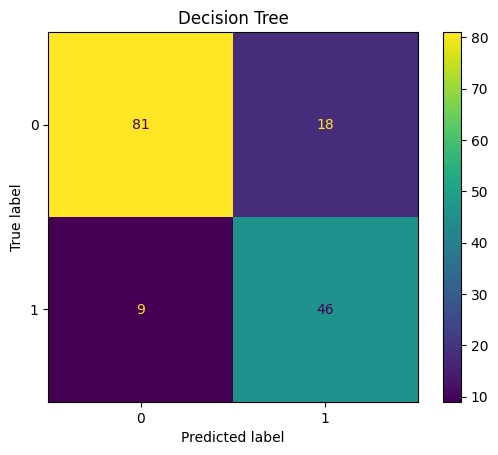

DT Accuracy Score: 0.8246753246753247
DT Precision Score: 0.71875
DT Recall Score: 0.8363636363636363
DT F1 Score: 0.773109243697479
DT ROC AUC Score: 0.8272727272727273


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)

dt_accuracy_score = accuracy_score(Y_test, dt_pred)
dt_precision_score = precision_score(Y_test, dt_pred)
dt_recall_score = recall_score(Y_test, dt_pred)
dt_f1_score = f1_score(Y_test, dt_pred)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Y_test, dt_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)

res['DT'] = pd.DataFrame({'DT': [dt_accuracy_score, dt_precision_score, dt_recall_score, dt_f1_score, dt_roc_auc]})
cm = confusion_matrix(Y_test, dt_pred, labels = dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)

disp.plot()
plt.title('Decision Tree')
plt.show() 

print('DT Accuracy Score:', dt_accuracy_score)
print('DT Precision Score:', dt_precision_score)
print('DT Recall Score:', dt_recall_score)
print('DT F1 Score:', dt_f1_score)
print('DT ROC AUC Score:', dt_roc_auc)

# Fitting Random Forest Classifier Model

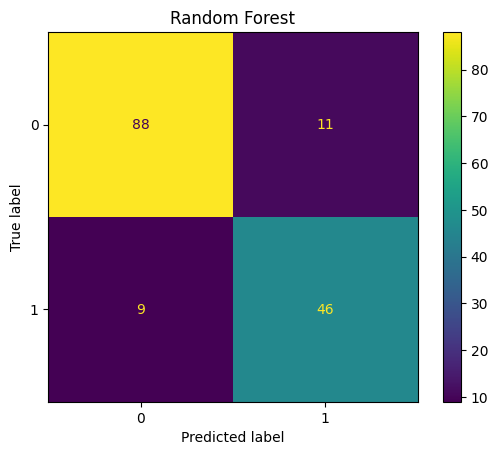

RF Accuracy Score: 0.8701298701298701
RF Precision Score: 0.8070175438596491
RF Recall Score: 0.8363636363636363
RF F1 Score: 0.8214285714285714
RF AUC Score: 0.8626262626262625


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)

rf_accuracy_score = accuracy_score(Y_test, rf_pred)
rf_precision_score = precision_score(Y_test, rf_pred)
rf_recall_score = recall_score(Y_test, rf_pred)
rf_f1_score = f1_score(Y_test, rf_pred)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_pred)
rf_auc = auc(rf_fpr, rf_tpr)

res['RF'] = pd.DataFrame({'RF': [rf_accuracy_score, rf_precision_score, rf_recall_score, rf_f1_score, rf_auc]})
cm = confusion_matrix(Y_test, rf_pred, labels = rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)

disp.plot()
plt.title('Random Forest')
plt.show() 

print('RF Accuracy Score:', rf_accuracy_score)
print('RF Precision Score:', rf_precision_score)
print('RF Recall Score:', rf_recall_score)
print('RF F1 Score:', rf_f1_score)
print('RF AUC Score:', rf_auc)

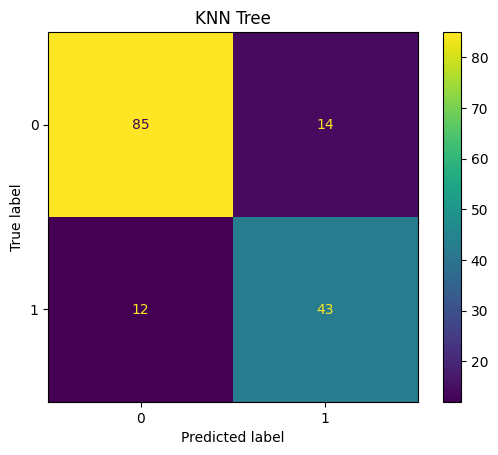

KNN Accuracy Score: 0.8311688311688312
KNN Precision Score: 0.7543859649122807
KNN Recall Score: 0.7818181818181819
KNN F1 Score: 0.7678571428571429
KNN AUC Score: 0.8202020202020202


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

knn_accuracy_score = accuracy_score(Y_test, knn_pred)
knn_precision_score = precision_score(Y_test, knn_pred)
knn_recall_score = recall_score(Y_test, knn_pred)
knn_f1_score = f1_score(Y_test, knn_pred)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(Y_test, knn_pred)
knn_auc = auc(knn_fpr, knn_tpr)

res['KNN'] = pd.DataFrame({'KNN': [knn_accuracy_score, knn_precision_score, knn_recall_score, knn_f1_score, knn_auc]})
cm = confusion_matrix(Y_test, knn_pred, labels = knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)

disp.plot()
plt.title('KNN Tree')
plt.show() 

print('KNN Accuracy Score:', knn_accuracy_score)
print('KNN Precision Score:', knn_precision_score)
print('KNN Recall Score:', knn_recall_score)
print('KNN F1 Score:', knn_f1_score)
print('KNN AUC Score:', knn_auc)

# Fitting Naive Bayes Model

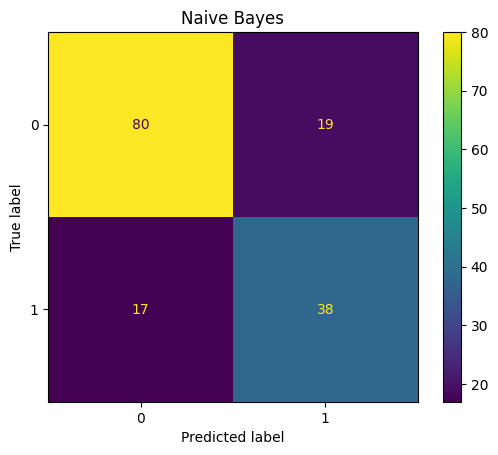

NB Accuracy Score: 0.7662337662337663
NB Precision Score: 0.6666666666666666
NB Recall Score: 0.6909090909090909
NB F1 Score: 0.6785714285714286
NB AUC Score: 0.7494949494949495


In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, Y_train)

nb_pred = nb.predict(X_test)
nb_pred_proba = nb.predict_proba(X_test)

nb_accuracy_score = accuracy_score(Y_test, nb_pred)
nb_precision_score = precision_score(Y_test, nb_pred)
nb_recall_score = recall_score(Y_test, nb_pred)
nb_f1_score = f1_score(Y_test, nb_pred)
nb_fpr, nb_tpr, nb_thresholds = roc_curve(Y_test, nb_pred)
nb_auc = auc(nb_fpr, nb_tpr)

res['NB'] = pd.DataFrame({'NB': [nb_accuracy_score, nb_precision_score, nb_recall_score, nb_f1_score, nb_auc]})
cm = confusion_matrix(Y_test, nb_pred, labels = nb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb.classes_)

disp.plot()
plt.title('Naive Bayes')
plt.show() 

print('NB Accuracy Score:', nb_accuracy_score)
print('NB Precision Score:', nb_precision_score)
print('NB Recall Score:', nb_recall_score)
print('NB F1 Score:', nb_f1_score)
print('NB AUC Score:', nb_auc)

# Fitting Gradient Boosting Model

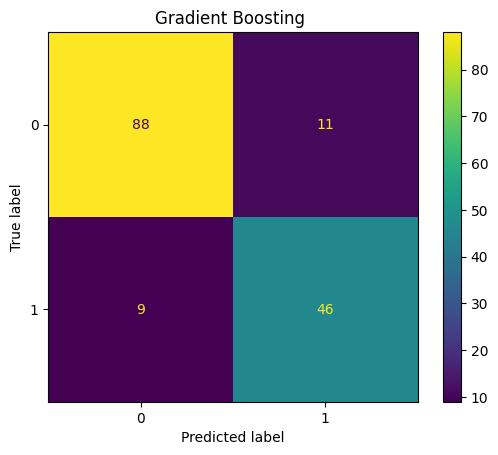

NB Accuracy Score: 0.8701298701298701
NB Precision Score: 0.8070175438596491
NB Recall Score: 0.8363636363636363
NB F1 Score: 0.8214285714285714
NB AUC Score: 0.7494949494949495


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train, Y_train)

gb_pred = gb.predict(X_test)
gb_pred_proba = gb.predict_proba(X_test)

gb_accuracy_score = accuracy_score(Y_test, gb_pred)
gb_precision_score = precision_score(Y_test, gb_pred)
gb_recall_score = recall_score(Y_test, gb_pred)
gb_f1_score = f1_score(Y_test, gb_pred)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(Y_test, gb_pred)
gb_auc = auc(nb_fpr, nb_tpr)

res['GB'] = pd.DataFrame({'GB': [gb_accuracy_score, gb_precision_score, gb_recall_score, gb_f1_score, gb_auc]})
cm = confusion_matrix(Y_test, gb_pred, labels = gb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gb.classes_)

disp.plot()
plt.title('Gradient Boosting ')
plt.show() 

print('NB Accuracy Score:', gb_accuracy_score)
print('NB Precision Score:', gb_precision_score)
print('NB Recall Score:', gb_recall_score)
print('NB F1 Score:', gb_f1_score)
print('NB AUC Score:', gb_auc)

# Fitting Ada Boost Model

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


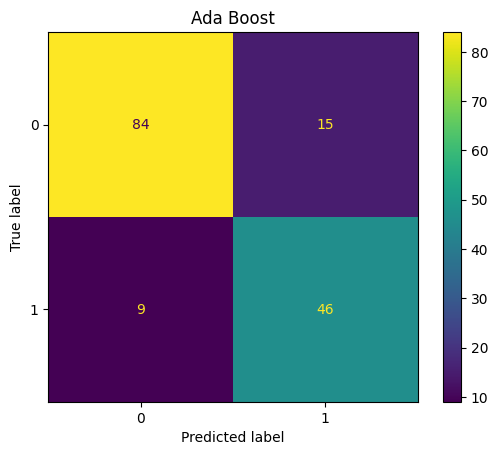

AB Accuracy Score: 0.8441558441558441
AB Precision Score: 0.7540983606557377
AB Recall Score: 0.8363636363636363
AB F1 Score: 0.7931034482758621
AB AUC Score: 0.8424242424242424


In [29]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

ab.fit(X_train, Y_train)

ab_pred = ab.predict(X_test)
ab_pred_proba = ab.predict_proba(X_test)

ab_accuracy_score = accuracy_score(Y_test, ab_pred)
ab_precision_score = precision_score(Y_test, ab_pred)
ab_recall_score = recall_score(Y_test, ab_pred)
ab_f1_score = f1_score(Y_test, ab_pred)
ab_fpr, ab_tpr, ab_thresholds = roc_curve(Y_test, ab_pred)
ab_auc = auc(ab_fpr, ab_tpr)

res['AB'] = pd.DataFrame({'AB': [ab_accuracy_score, ab_precision_score, ab_recall_score, ab_f1_score, ab_auc]})
cm = confusion_matrix(Y_test, ab_pred, labels = ab.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ab.classes_)

disp.plot()
plt.title('Ada Boost')
plt.show() 

print('AB Accuracy Score:', ab_accuracy_score)
print('AB Precision Score:', ab_precision_score)
print('AB Recall Score:', ab_recall_score)
print('AB F1 Score:', ab_f1_score)
print('AB AUC Score:', ab_auc)

# Setting Parameter to display ROC Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


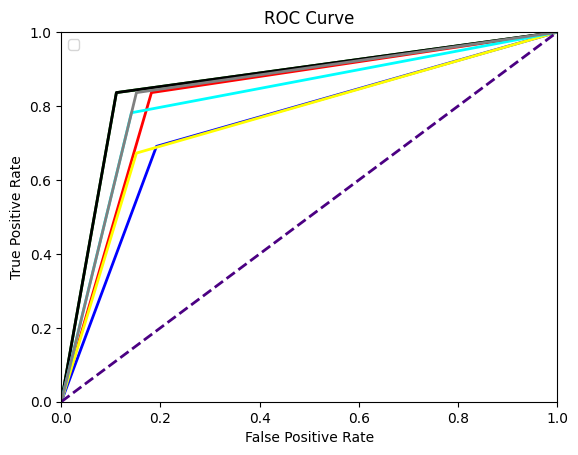

In [30]:
plt.figure()

# plt.plot(dt_fpr, dt_tpr, color = 'red', lw = 2, label = 'Decision Tree (area = %0.3f)' % dt_roc_curve)

plt.plot(dt_fpr, dt_tpr, color = 'red', lw = 2)
plt.plot(rf_fpr, rf_tpr, color = 'green', lw = 2)
plt.plot(nb_fpr, nb_tpr, color = 'blue', lw = 2)
plt.plot(LogReg_fpr, LogReg_tpr, color = 'yellow', lw = 2)
plt.plot(gb_fpr, gb_tpr, color = 'black', lw = 2)


plt.plot(knn_fpr, knn_tpr, color = 'cyan', lw = 2)
plt.plot(ab_fpr, ab_tpr, color = 'grey', lw = 2)

plt.plot([0,1],[0,1], color = 'indigo', lw = 2, linestyle = '--')
plt.legend(loc = 0)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()